In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker  
%matplotlib inline

In [2]:
data = pd.read_csv('./src/phones_data.csv', index_col = 0)
data.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


Text(0.5, 1.0, 'Price by battery size')

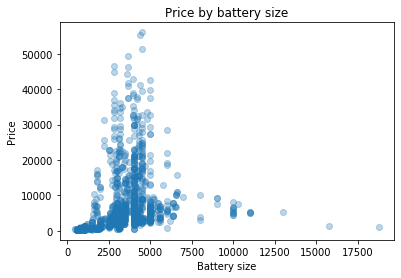

In [3]:
battery = data.battery_size.values
price = data.best_price.values
plt.scatter(battery, price, alpha=0.3)
plt.xlabel('Battery size')
plt.ylabel('Price')
plt.title('Price by battery size')

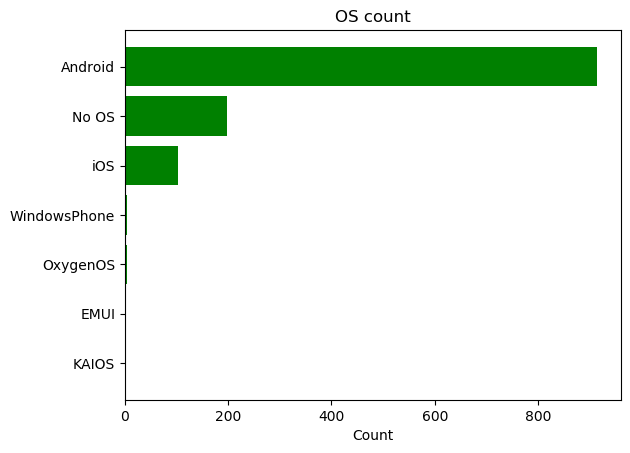

In [4]:
data2 = data.os.fillna(value='No OS')
os_values = np.unique(data2.values, return_counts=True)  
os_count = len(os_values[0]) 

plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame({
    'os': os_values[0],
    'counts': os_values[1]
}).sort_values(by=['counts'])

os = df.os[::-1]
counts = df.counts[::-1]

positions = np.arange(os_count)

ax.barh(positions, counts, align='center', color='green', ecolor='black')
ax.set_yticks(positions)
ax.set_yticklabels(os)
ax.invert_yaxis()  
ax.set_xlabel('Count')
ax.set_title('OS count')

plt.show()

Text(0.5, 1.0, 'Price by memory size')

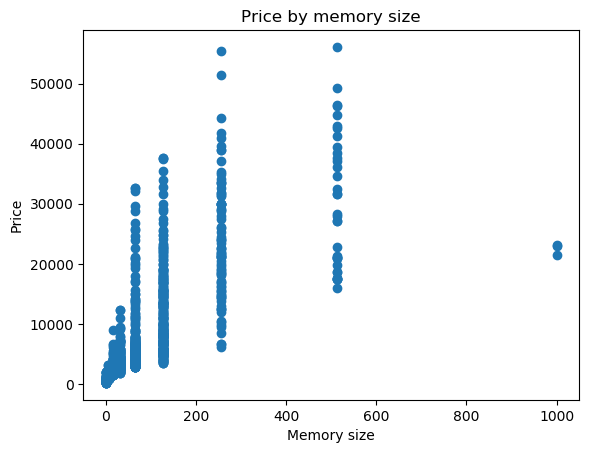

In [5]:
memory = data.memory_size.values
price = data.best_price.values
plt.scatter(memory, price)
plt.xlabel('Memory size')
plt.ylabel('Price')
plt.title('Price by memory size')

Text(0.5, 1.0, 'Screen by battery size')

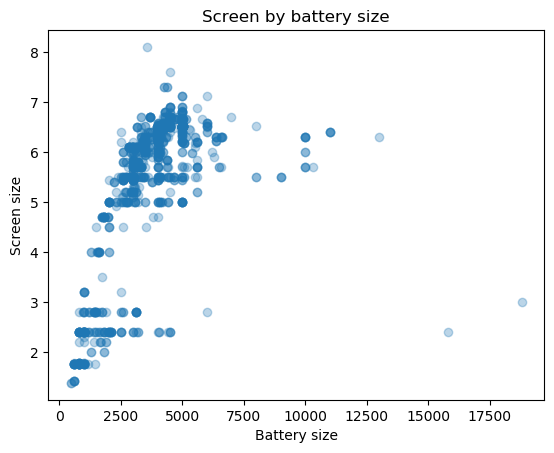

In [6]:
screen_size = data.screen_size.values
battery_size = data.battery_size.values
plt.scatter(battery_size, screen_size, alpha=0.3)
plt.xlabel('Battery size')
plt.ylabel('Screen size')
plt.title('Screen by battery size')

Text(0.5, 1.0, 'Price by screen size')

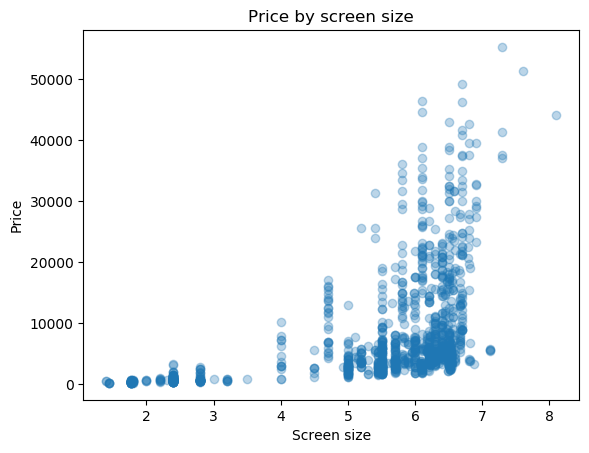

In [7]:
screen_size = data.screen_size.values
price = data.best_price.values
plt.scatter(screen_size, price, alpha = 0.3)
plt.xlabel('Screen size')
plt.ylabel('Price')
plt.title('Price by screen size')

In [8]:
temp = data[data.lowest_price.isna()]
temp.lowest_price = temp.best_price
temp.highest_price = temp.best_price
data[data.lowest_price.isna()] = temp

C:\Users\mrfre\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Amount of sellers by price difference')

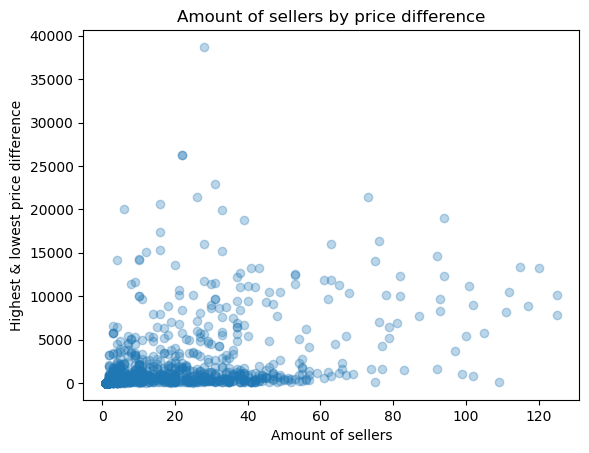

In [9]:
diff = data.highest_price.values - data.lowest_price.values
sellers = data.sellers_amount.values
plt.scatter(sellers, diff, alpha=0.3)
plt.xlabel('Amount of sellers')
plt.ylabel('Highest & lowest price difference')
plt.title('Amount of sellers by price difference')

In [10]:
class SimilarPhones():
    
    def __init__(self, rec_data):
        self.data_ = rec_data.copy(True)
        self.numeric_cols = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
        
    def get_numeric_indeces(self, num_cols, missing_cols):
        result = []
        for col in num_cols:
            if col in missing_cols:
                continue
            result.append(list(self.data_.columns.values).index(col))
        return result
        
    def normalize_data(self):
        for col in self.numeric_cols:
            max_d = self.data_[col].max()
            min_d = self.data_[col].min()
            self.data_[col] = (self.data_[col] - min_d)/(max_d - min_d)
        return self.data_
        
    def get_best(self, phone_idx, missing_cols = [], phones_amount=5,):
        distances = []
        phone = self.data_.iloc[phone_idx]
        ind = self.get_numeric_indeces(self.numeric_cols, missing_cols)
        res_data = self.data_.drop(columns=[])
        for p in res_data.values:
            dist = 0
            for col in range(len(res_data.columns)):
                if not col in ind:
                    continue
                dist = dist + np.absolute(float(p[col]) - float(phone[col]))
            distances.append(dist)
        res_data['distance'] = distances
        res_data = res_data.sort_values('distance')
        return res_data[1:phones_amount+1].index

In [11]:
finder = SimilarPhones(data)
b_idxs = data[data.battery_size.isna()].index
finder.normalize_data()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,0.344235,0.026419,0.026726,0.022789,0.282258,0.537313,0.007997,0.083969,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,0.263287,0.028442,0.029337,0.032392,0.282258,0.537313,0.015997,0.083969,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,0.243663,0.028442,0.029337,0.032392,0.282258,0.537313,0.015997,0.083969,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,0.233851,0.028442,0.029337,0.032392,0.282258,0.537313,0.015997,0.083969,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,0.855274,0.031950,0.036164,0.025369,0.072581,0.643284,0.015997,0.138495,4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,0.899428,0.402216,0.317664,0.396603,0.483871,0.761194,0.063997,0.147983,9-2018
1220,Apple,iPhone XS Max Dual Sim 64GB Gold (MT732),iOS,0.432543,0.436493,0.436557,0.480020,0.217742,0.761194,0.063997,0.147983,9-2018
1221,HUAWEI,nova 5T 6/128GB Black (51094MEU),Android,0.959117,0.153755,0.156643,0.140032,0.137097,0.725373,0.127997,0.179389,11-2019
1222,ZTE,nubia Red Magic 5G 8/128GB Black,Android,0.614064,0.331872,0.367503,0.269184,0.008065,0.783582,0.127997,0.220284,10-2020


In [12]:
for idx in b_idxs:
    name = data.iloc[idx].model_name
    result = data.iloc[finder.get_best(idx, ['battery_size'], 4)]
    result = result.battery_size.values
    print("Phone : {}, missing data from similar phones : {}".format(name,  result))

Phone : A8 3/32GB Black, missing data from similar phones : [3000. 4000. 3500. 2600.]
Phone : Armor 3W 6/64GB Black, missing data from similar phones : [4000. 3000. 4000. 3300.]
Phone : Armor X7 2/16GB Orange, missing data from similar phones : [4000. 4400. 4400. 5000.]
Phone : Mobile GM8 Space Gray, missing data from similar phones : [4000. 3000. 3000. 3020.]
Phone : iPhone 8 128GB Gold (MX182), missing data from similar phones : [1828. 3100. 1828. 3800.]
Phone : iPhone 8 256GB Space Gray (MQ7F2), missing data from similar phones : [1828. 1828. 2900.   nan]
Phone : iPhone 8 64GB Space Gray (MQ6G2), missing data from similar phones : [1960. 1960.   nan 2900.]
Phone : iPhone 8 Plus 128GB Gold (MX262), missing data from similar phones : [2942. 1828. 2942. 2942.]
Phone : iPhone 8 Plus 256GB Space Gray (MQ8G2), missing data from similar phones : [2942. 2716.   nan 2900.]
Phone : iPhone 8 Plus 64GB Space Gray (MQ8L2), missing data from similar phones : [2900. 2568. 2900. 2716.]


In [13]:
b_size = []
for idx in b_idxs:
    result = data.iloc[finder.get_best(idx, ['battery_size'], 4)].battery_size.values
    b_size.append(scipy.stats.mode(result)[0][0])
b_size

[2600.0,
 4000.0,
 4400.0,
 3000.0,
 1828.0,
 1828.0,
 1960.0,
 2942.0,
 2716.0,
 2900.0]

In [14]:
temp = data[data.battery_size.isna()]
temp.battery_size = b_size
data[data.battery_size.isna()] = temp

In [15]:
s_idxs = data[data.screen_size.isna()].index
s_size = []

for idx in s_idxs:
    name = data.iloc[idx].model_name
    result = data.iloc[finder.get_best(idx, ['screen_size'], 4)].screen_size.values
    print("Phone : {}, missing data from similar phones : {}".format(name,  result))
    s_size.append(scipy.stats.mode(result)[0][0])
    
temp = data[data.screen_size.isna()]
temp.screen_size = s_size
data[data.screen_size.isna()] = temp

Phone : Comfort 50 Shell Duo Red (4827798212325), missing data from similar phones : [5.   5.   5.   5.71]
Phone : Mate Xs 8/512GB Interstellar blue (51095CSQ), missing data from similar phones : [6.7 6.1 7.3 7.3]


In [16]:
data.to_csv('src/fix_data.csv')